# creating Togo EDA notebook

In [1]:
print("Togo EDA notebook created")


Togo EDA notebook created


In [4]:
import os

file_path = r"src\notebooks\togo_eda.ipynb"
print(os.path.exists(file_path)) 


False


In [5]:
import os
print(os.getcwd())


c:\Users\HP\OneDrive\Desktop\solar-challenge-week0\solar-challenge-week0\src\notebooks


In [6]:
import nbformat
import os

# Absolute path to the new notebook
notebook_path = r"C:\Users\HP\OneDrive\Desktop\solar-challenge-week0\solar-challenge-week0\src\notebooks\togo_eda.ipynb"

# Make sure the folder exists
os.makedirs(os.path.dirname(notebook_path), exist_ok=True)

# Create a new empty notebook
nb = nbformat.v4.new_notebook()
nb['cells'] = []

# Add a single code cell to make it non-empty
nb['cells'].append(nbformat.v4.new_code_cell("print('Togo EDA notebook created')"))

# Write the notebook to disk
with open(notebook_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print(f"New notebook created: {notebook_path}")


New notebook created: C:\Users\HP\OneDrive\Desktop\solar-challenge-week0\solar-challenge-week0\src\notebooks\togo_eda.ipynb


In [7]:
import nbformat

file_path = r"C:\Users\HP\OneDrive\Desktop\solar-challenge-week0\solar-challenge-week0\src\notebooks\togo_eda.ipynb"
nb = nbformat.read(file_path, as_version=4)
nbformat.validate(nb)
print("Notebook is valid!")


Notebook is valid!


# Exploratory Data Analysis (EDA) – Solar Dataset

This notebook performs a thorough EDA including summary statistics, missing-value analysis, outlier detection, cleaning, visualizations, and correlation analysis.

In [14]:

## 1. Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
country = "togo-dapaong_qc.csv"
df = pd.read_csv(f"../../data/{country}", parse_dates=["Timestamp"])

# Quick look
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

# Summary Statistics & Missing-Value Report

In [15]:
# Numeric summary
df.describe()

# Missing values
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
missing_report = pd.DataFrame({"Missing": missing, "Percent": missing_percent})
missing_report

# Columns with >5% nulls
missing_report[missing_report["Percent"] > 5]


,Missing,Percent
Comments,525600,100.0


# Outlier Detection & Basic Cleaning

In [16]:
# Columns to check
cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = df[cols_to_check].apply(zscore)

# Flag rows with |Z|>3
outliers = (np.abs(z_scores) > 3)
outliers_count = outliers.sum()
outliers_count

# Optionally drop outliers or impute median
for col in cols_to_check:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)  # fill missing
    df.loc[np.abs(zscore(df[col])) > 3, col] = median_val  # replace outliers


# Export Cleaned Data

In [17]:
# Make sure 'data/' is in .gitignore
df.to_csv(f"../../data/{country}", index=False)


# Time Series Analysis

c:\Users\HP\OneDrive\Desktop\solar-challenge-week0\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


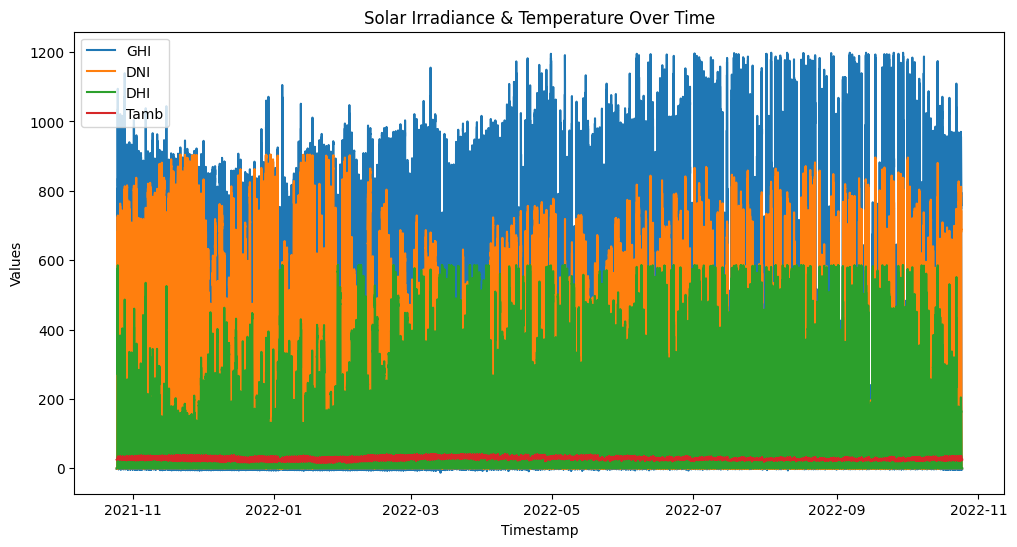

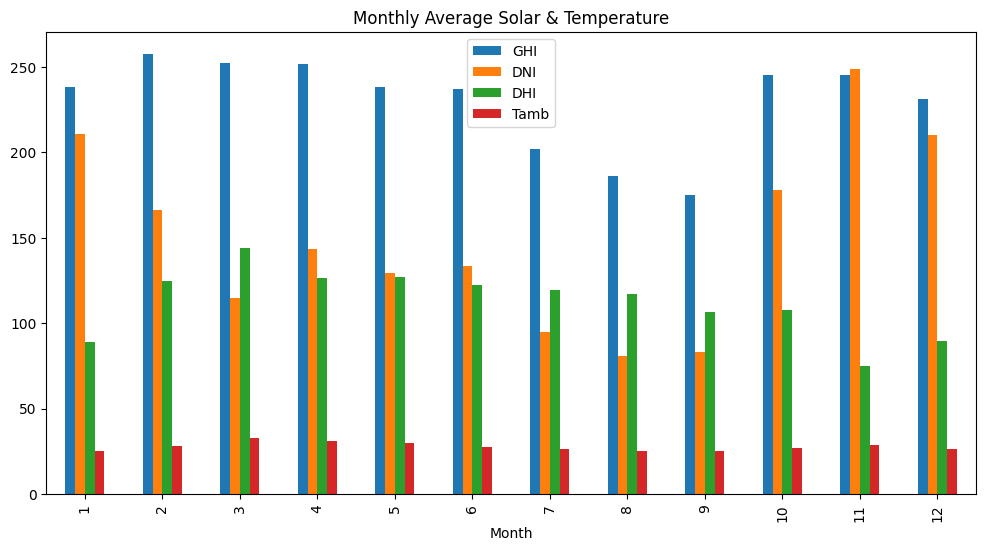

In [18]:
# Line plots
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Timestamp", y="GHI", label="GHI")
sns.lineplot(data=df, x="Timestamp", y="DNI", label="DNI")
sns.lineplot(data=df, x="Timestamp", y="DHI", label="DHI")
sns.lineplot(data=df, x="Timestamp", y="Tamb", label="Tamb")
plt.title("Solar Irradiance & Temperature Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.show()

# Observe monthly or daily patterns
df['Month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('Month')[['GHI','DNI','DHI','Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Average Solar & Temperature")
plt.show()


# Cleaning Impact Analysis

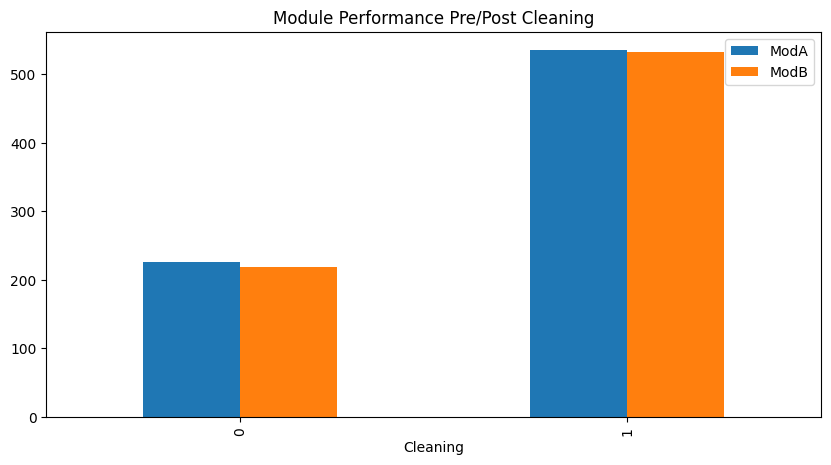

In [19]:
# Compare module readings pre/post cleaning
if 'Cleaning' in df.columns:
    df.groupby('Cleaning')[['ModA','ModB']].mean().plot(kind='bar', figsize=(10,5))
    plt.title("Module Performance Pre/Post Cleaning")
    plt.show()


# Correlation & Relationship Analysis

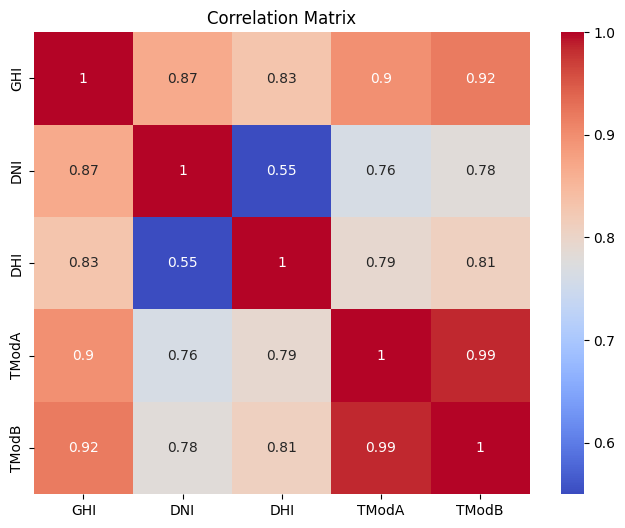

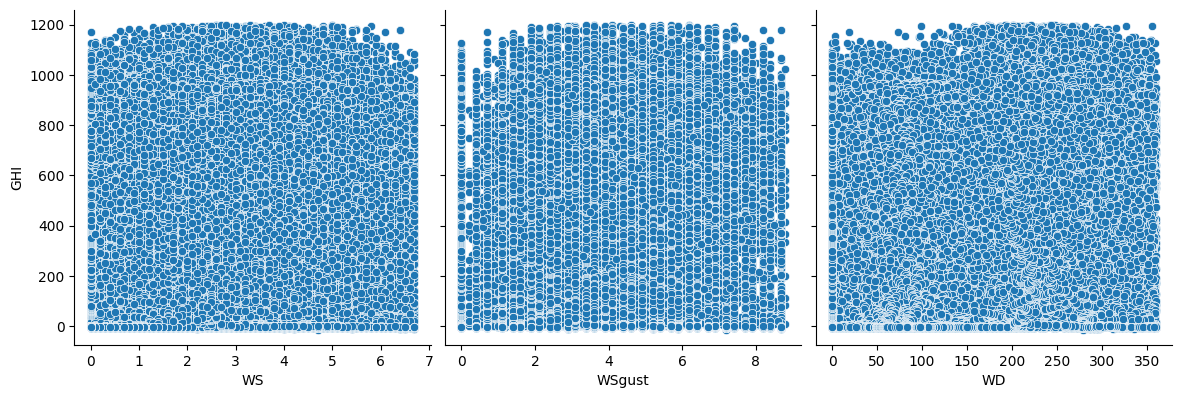

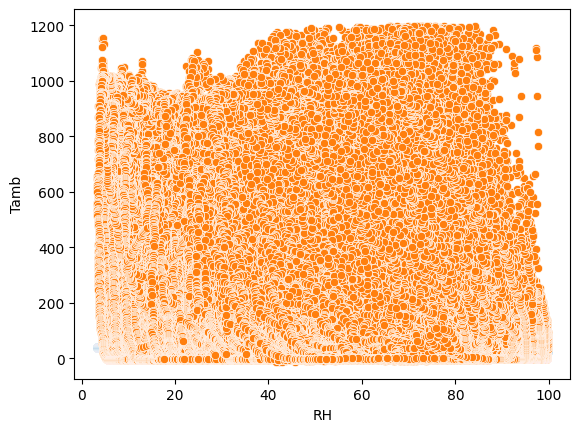

In [20]:
# Heatmap
corr_cols = ["GHI","DNI","DHI","TModA","TModB"]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter plots
sns.pairplot(df, x_vars=["WS","WSgust","WD"], y_vars=["GHI"], height=4, kind='scatter')
plt.show()

sns.scatterplot(data=df, x="RH", y="Tamb")
sns.scatterplot(data=df, x="RH", y="GHI")
plt.show()


# Wind & Distribution Analysis

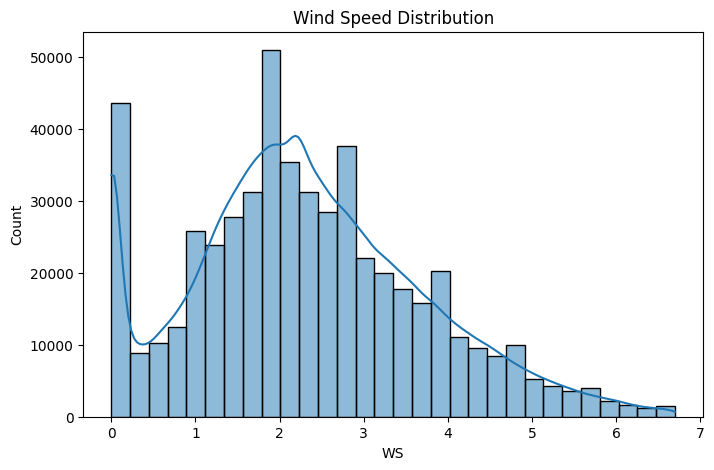

<Figure size 600x600 with 0 Axes>

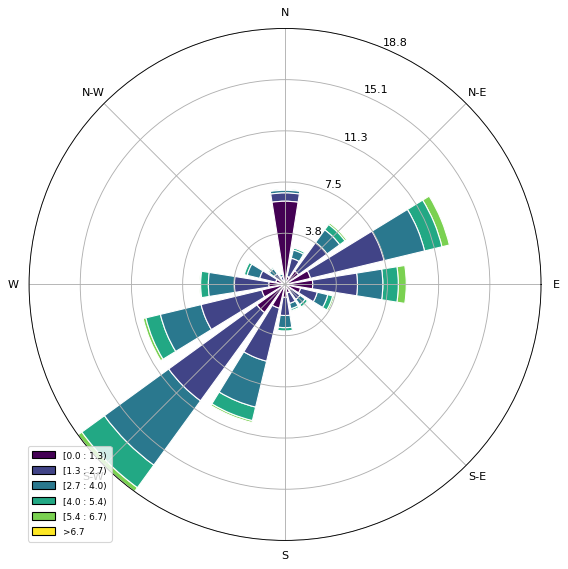

In [21]:
# Histogram for WS
plt.figure(figsize=(8,5))
sns.histplot(df["WS"], bins=30, kde=True)
plt.title("Wind Speed Distribution")
plt.show()

# Wind rose (radial bar plot)
# Requires installation: pip install windrose
from windrose import WindroseAxes

plt.figure(figsize=(6,6))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


# Temperature Analysis

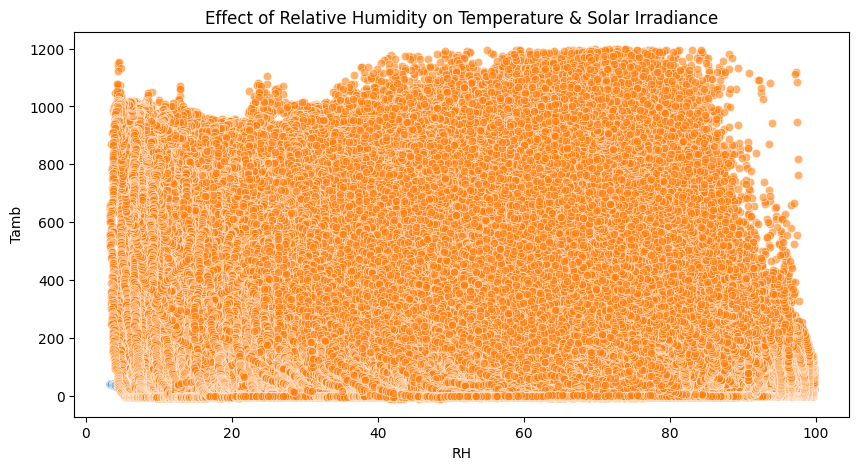

In [22]:
# RH vs Temperature & GHI
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.6)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.6)
plt.title("Effect of Relative Humidity on Temperature & Solar Irradiance")
plt.show()


# Bubble Chart

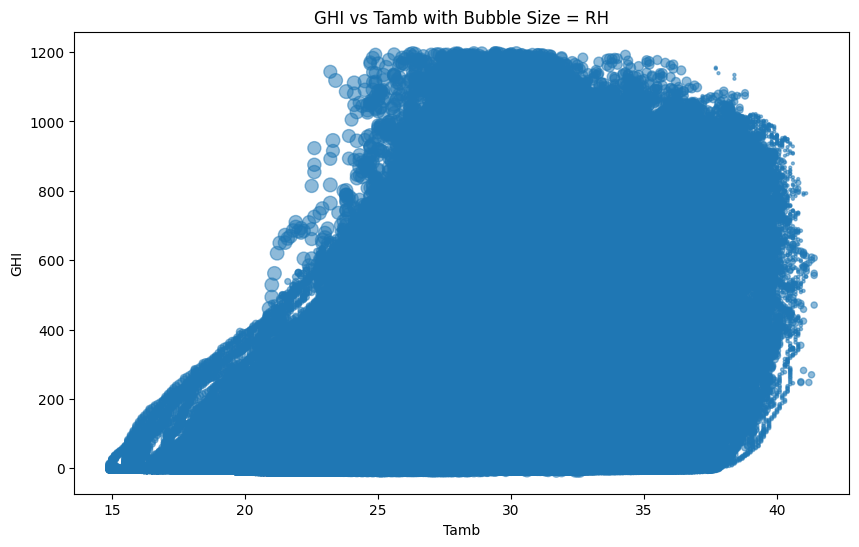

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel("Tamb")
plt.ylabel("GHI")
plt.title("GHI vs Tamb with Bubble Size = RH")
plt.show()
